In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Считываем данные и сразу удалим неинформативный признак**

In [75]:
df = pd.read_excel('data_kurs.xlsx')
df.drop('Unnamed: 0', axis=1, inplace=True)

**Просмотрим данные**

In [76]:
df.head()

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,...,0,0,0,0,0,0,0,0,3,0
1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,...,0,0,0,0,0,0,0,0,3,0
2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,446.808,...,0,0,0,0,0,0,0,0,3,0
3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,398.679,...,0,0,0,0,0,0,0,0,4,0
4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,466.713,...,0,0,0,0,0,0,0,0,0,0


**Информация о типе признаков**

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 213 entries, IC50, mM to fr_urea
dtypes: float64(107), int64(106)
memory usage: 1.6 MB


**Статистика каждого признака**

In [78]:
df.describe()

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.0,1001.000000,1001.000000,1001.000000
mean,222.805156,589.110728,72.508823,10.831637,10.831637,0.180681,-0.967237,0.580412,29.487989,348.262234,...,0.053946,0.011988,0.008991,0.000999,0.000999,0.051948,0.0,0.069930,0.204795,0.006993
std,402.169734,642.867508,684.482739,3.307505,3.307505,0.168710,1.588036,0.212230,12.742749,126.946370,...,0.259011,0.108886,0.094441,0.031607,0.031607,0.222033,0.0,0.255157,1.215326,0.083373
min,0.003517,0.700808,0.011489,2.321942,2.321942,0.000039,-6.992796,0.059567,9.416667,110.156000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,12.515396,99.999036,1.433333,9.252350,9.252350,0.051073,-1.334487,0.442842,18.486486,264.321000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,46.585183,411.039342,3.846154,12.179236,12.179236,0.124606,-0.419485,0.634981,29.290323,315.457000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,224.975928,894.089176,16.566667,13.167843,13.167843,0.291020,0.061754,0.742483,38.750000,409.283000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,4128.529377,4538.976189,15620.600000,15.933463,15.933463,1.374614,1.374614,0.947265,60.272727,904.777000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,20.000000,1.000000


### **Работа с пропусками**

In [80]:
# Выведем признаки с пропусками
null_counts = df.isnull().sum()
null_counts[null_counts > 0]


MaxPartialCharge       3
MinPartialCharge       3
MaxAbsPartialCharge    3
MinAbsPartialCharge    3
BCUT2D_MWHI            3
BCUT2D_MWLOW           3
BCUT2D_CHGHI           3
BCUT2D_CHGLO           3
BCUT2D_LOGPHI          3
BCUT2D_LOGPLOW         3
BCUT2D_MRHI            3
BCUT2D_MRLOW           3
dtype: int64

In [81]:
# Малое количество пропусков, поэтому можно удалить
print(f'Перед удалением строк с пропусками было - {df.shape[0]}')
df = df.dropna()
print(f'После удаления строк с пропусками стало - {df.shape[0]}')

Перед удалением строк с пропусками было - 1001
После удаления строк с пропусками стало - 998


### **Обработка выбросов**

**Построим коробчатую диаграаму "IC50, mM" для визуальной оценки**

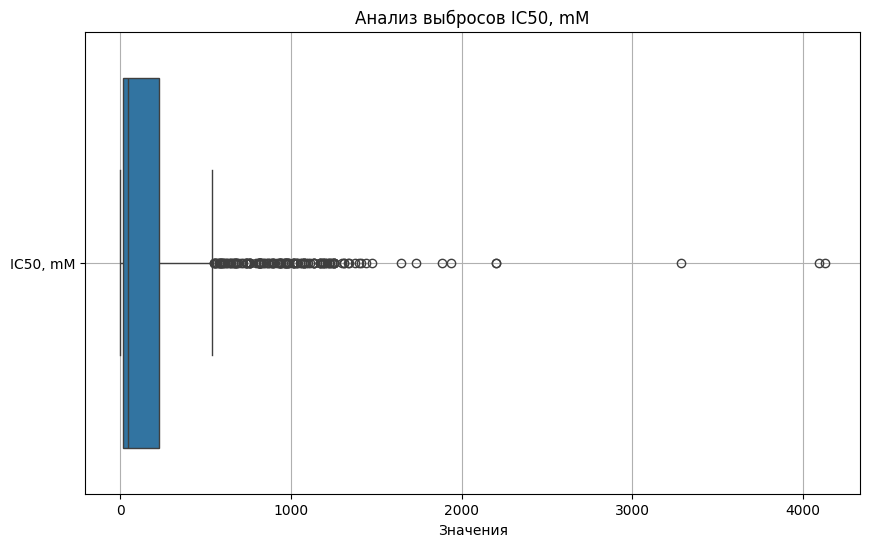

In [82]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['IC50, mM']], orient='h')
plt.title('Анализ выбросов IC50, mM')
plt.xlabel('Значения')
plt.grid(True)
plt.show()

**Построим коробчатую диаграаму "CC50, mM" для визуальной оценки**

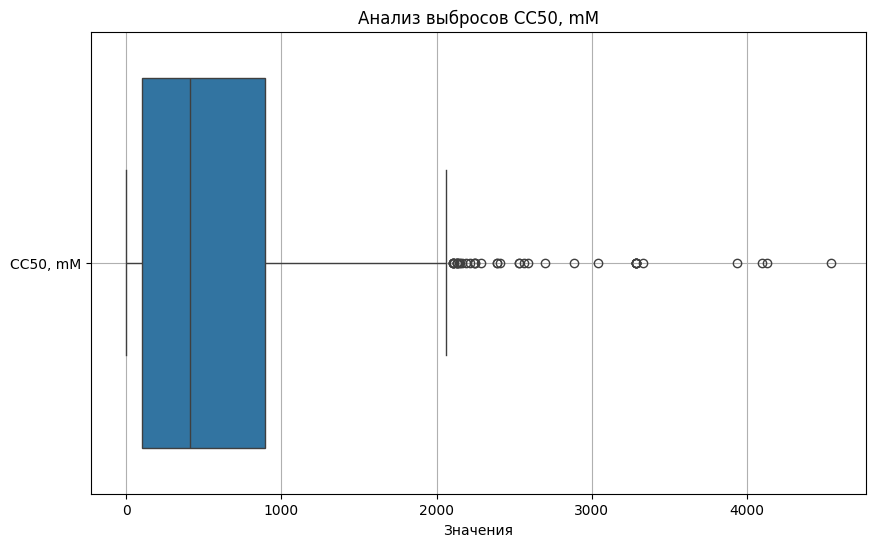

In [83]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['CC50, mM']], orient='h')
plt.title('Анализ выбросов CC50, mM')
plt.xlabel('Значения')
plt.grid(True)
plt.show()

**Если считать выбросы исходя из коробчатых диаграмм, то можем потерять полезные данные**

**Из дополнительных источников была получена информация, что IC50 может превышать 1000 mM (1 M)**

**IC50 может быть >1000 mM, но это означает, что вещество практически **неактивно** в биологическом контексте**

**Будем считать их выбросами**

In [84]:
count = (df['IC50, mM'] > 1000).sum()
print(f"Количество строк с IC50 > 1000: {count}")

df = df[df['IC50, mM'] < 1000]

Количество строк с IC50 > 1000: 60


**СС50 может быть абсолютно любым, про выбросы ничего сказать не можем**

**Значение SI > 1000 - скорее всего тоже являются выбросами, так как Значения SI > 1000 встречаются крайне редко, так как требуют почти нулевой токсичности**

In [85]:
count = (df['SI'] > 1000).sum()
print(f"Количество строк с SI > 1000: {count}")

df = df[df['SI'] < 1000]

Количество строк с SI > 1000: 8


### **Проверяем на дубликаты**

In [86]:
duplicates = df[df.duplicated()]

**Просмотрим дубликаты**

In [87]:
duplicates

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
84,83.619244,2533.916472,30.303030,8.848320,8.848320,0.261583,0.261583,0.722639,44.571429,197.322,...,0,0,0,0,0,0,0,0,0,0
95,5.191051,195.662678,37.692308,5.503519,5.503519,0.397743,0.397743,0.715571,35.555556,250.430,...,0,0,0,0,0,0,0,0,3,0
103,114.989975,2106.043502,18.315018,4.959653,4.959653,0.391420,0.391420,0.669233,38.000000,237.411,...,0,0,0,0,0,0,0,0,0,0
107,143.971301,1988.553884,13.812155,4.982986,4.982986,0.397080,0.397080,0.536458,36.555556,251.438,...,0,0,0,0,0,0,0,0,0,0
169,26.097736,411.039342,15.750000,6.129792,6.129792,0.442130,0.442130,0.566765,53.454545,153.269,...,0,0,0,0,0,0,0,0,0,0
172,11.339368,22.048772,1.944444,5.382755,5.382755,0.119792,0.119792,0.651871,29.500000,317.476,...,0,0,0,0,0,0,0,0,0,0
500,433.423587,764.865154,1.764706,13.943759,13.943759,0.025276,-6.992796,0.683628,13.769231,392.221,...,0,0,0,0,0,0,0,0,0,0
508,28.958312,30.695810,1.060000,12.764026,12.764026,0.103258,-4.525895,0.345716,12.130435,345.325,...,0,0,0,0,0,0,0,0,0,0
587,9.608517,304.269705,31.666667,13.481874,13.481874,0.210635,-2.106521,0.226676,11.545455,312.218,...,0,0,0,0,0,0,0,0,0,0
591,7.240029,118.736470,16.400000,13.025778,13.025778,0.001513,-1.127354,0.512568,11.400000,276.238,...,0,0,0,0,0,0,0,0,0,0


**Удалим все дубликаты**

In [88]:
df = df.drop_duplicates()

### **Проверяем распределения целевых переменных**

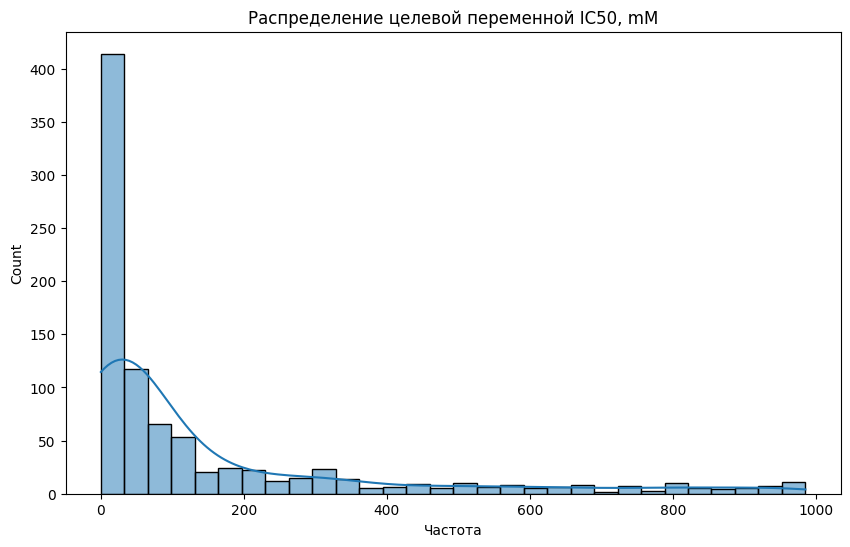

In [89]:
# Распределение целевой переменной IC50, mM
plt.figure(figsize=(10, 6))
sns.histplot(df['IC50, mM'], kde=True, bins=30)
plt.title("Распределение целевой переменной IC50, mM")
plt.xlabel("Значение")
plt.xlabel("Частота")
plt.show()

> **Распределение не нормальное**

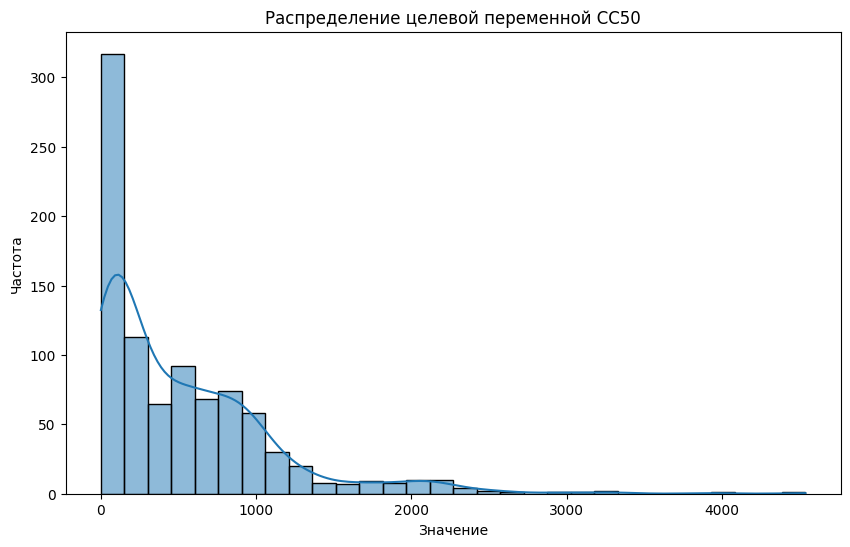

In [90]:
# Распределение целевой переменной CC50
plt.figure(figsize=(10, 6))
sns.histplot(df['CC50, mM'], kde=True, bins=30)
plt.title("Распределение целевой переменной CC50")
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.show()

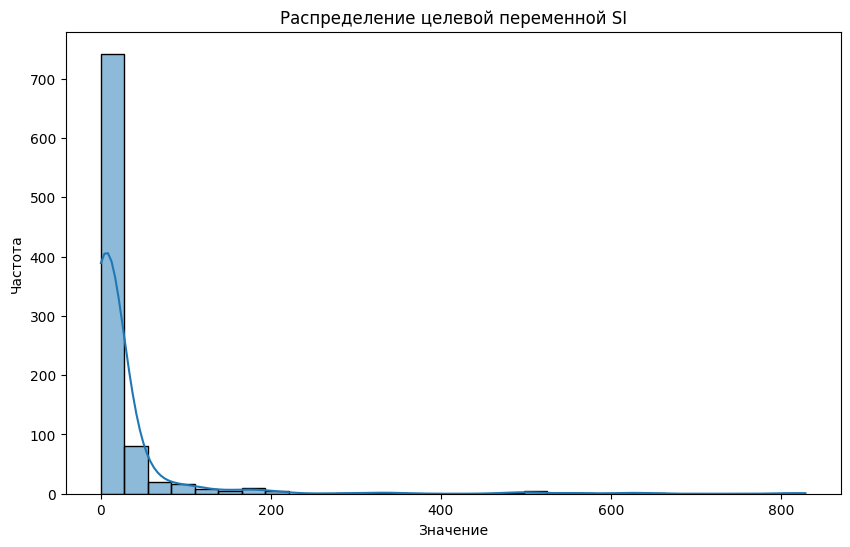

In [91]:
# Распределение целевой переменной SI
plt.figure(figsize=(10, 6))
sns.histplot(df['SI'], kde=True, bins=30)
plt.title("Распределение целевой переменной SI")
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.show()

**Логорифмируем целевые перменные для будущих моделей**

In [92]:
df['IC50, mM'] = np.log(df['IC50, mM'])
df['CC50, mM'] = np.log(df['CC50, mM'])
df['SI'] = np.log(df['SI'])

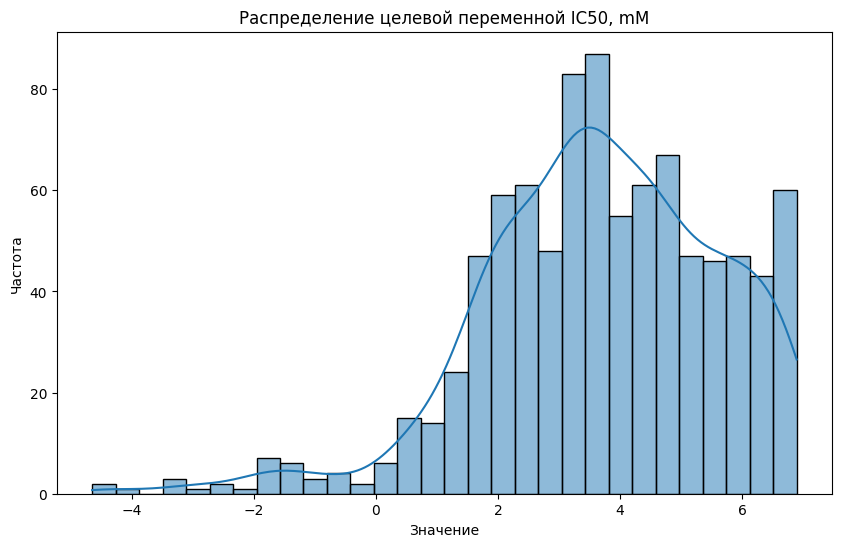

In [93]:
# Новое распределение целевой переменной IC50, mM
plt.figure(figsize=(10, 6))
sns.histplot(df['IC50, mM'], kde=True, bins=30)
plt.title("Распределение целевой переменной IC50, mM")
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.show()

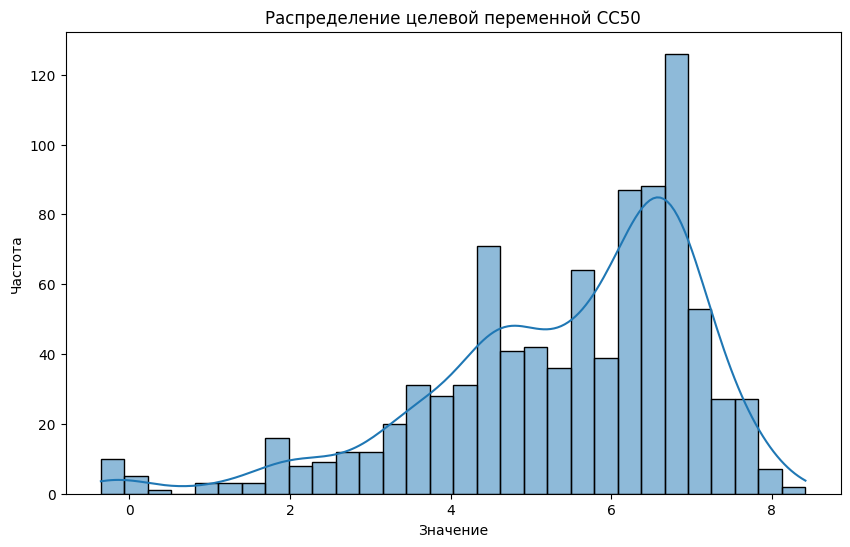

In [94]:
# Новое распределение целевой переменной CC50
plt.figure(figsize=(10, 6))
sns.histplot(df['CC50, mM'], kde=True, bins=30)
plt.title("Распределение целевой переменной CC50")
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.show()

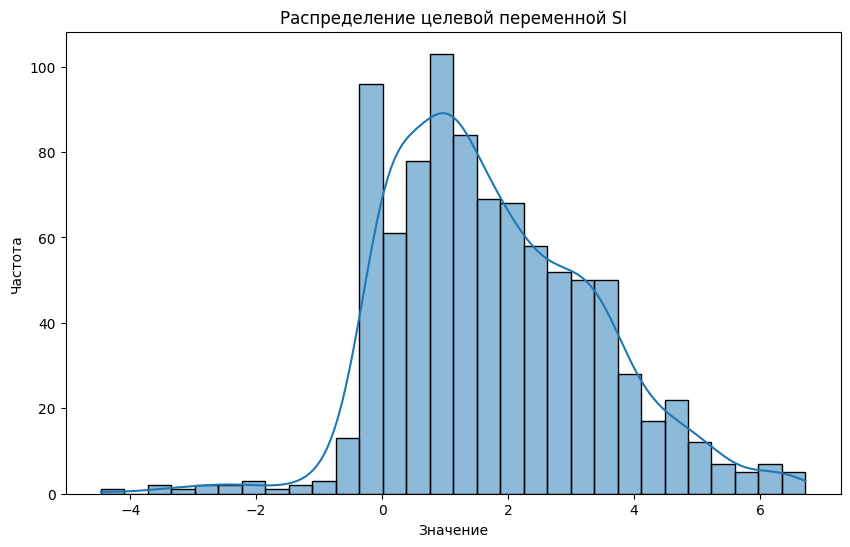

In [95]:
# Новое распределение целевой переменной SI
plt.figure(figsize=(10, 6))
sns.histplot(df['SI'], kde=True, bins=30)
plt.title("Распределение целевой переменной SI")
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.show()

### **Удаляем те признаки, у которых все значения 0**

In [96]:
numeric_cols = df.select_dtypes(include='number').columns
cols_zero_std = [
    col for col in numeric_cols 
    if df[col].std() == 0
]
print(cols_zero_std)

['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'fr_Ar_COO', 'fr_N_O', 'fr_SH', 'fr_azide', 'fr_barbitur', 'fr_benzodiazepine', 'fr_diazo', 'fr_dihydropyridine', 'fr_isocyan', 'fr_isothiocyan', 'fr_lactam', 'fr_nitroso', 'fr_phos_acid', 'fr_phos_ester', 'fr_prisulfonamd', 'fr_thiocyan']


**Удаляем найденные признаки**

In [97]:
df.drop(cols_zero_std, axis=1, inplace=True)

### **Работа с признаками**
**====== MaxEStateIndex, MinEStateIndex, MaxAbsEStateIndex, MinAbsEStateIndex ======**

In [98]:
# разброс электронных состояний
df['RangeEState'] = df['MaxEStateIndex'] - df['MinEStateIndex']

# средняя абсолютная величина
df['MeanEState'] = (df['MaxAbsEStateIndex'] + df['MinAbsEStateIndex']) / 2

# Удаляем используемые признаки
df.drop(['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex'], axis=1, inplace=True)

**====== MaxPartialCharge, MinPartialCharge, MaxAbsPartialCharge, MinAbsPartialCharge ======**


In [99]:
# разброс зарядов
df['RangePartical'] = df['MaxPartialCharge'] - df['MinPartialCharge']

# средняя абсолютная величина
df['MeanPartical'] = (df['MaxAbsPartialCharge'] + df['MinAbsPartialCharge']) / 2

# Удаляем используемые признаки
df.drop(['MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge'], axis=1, inplace=True)

**====== BCUT2D ======**

In [100]:
# Разница между верхними и нижними границами
df['Range_BCUT2D_MW'] = df['BCUT2D_MWHI'] - df['BCUT2D_MWLOW']
df['Range_BCUT2D_CHG'] = df['BCUT2D_CHGHI'] - df['BCUT2D_CHGLO']
df['Range_BCUT2D_LOGP'] = df['BCUT2D_LOGPHI'] - df['BCUT2D_LOGPLOW']
df['Range_BCUT2D_MR'] = df['BCUT2D_MRHI'] - df['BCUT2D_MRLOW']

# Удаляем используемые признаки
df.drop(['BCUT2D_MWHI', 'BCUT2D_MWLOW', 
         'BCUT2D_CHGHI', 'BCUT2D_CHGLO',
         'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW',
         'BCUT2D_MRHI', 'BCUT2D_MRLOW'], axis=1, inplace=True)

**====== MolWt, HeavyAtomMolWt, ExactMolWt ======**

In [101]:
# MolWt – Молекулярная масса
# ExactMolWt – Точная молекулярная масса

df.drop('MolWt', axis=1, inplace=True)

**====== Chi дескрипторы======**

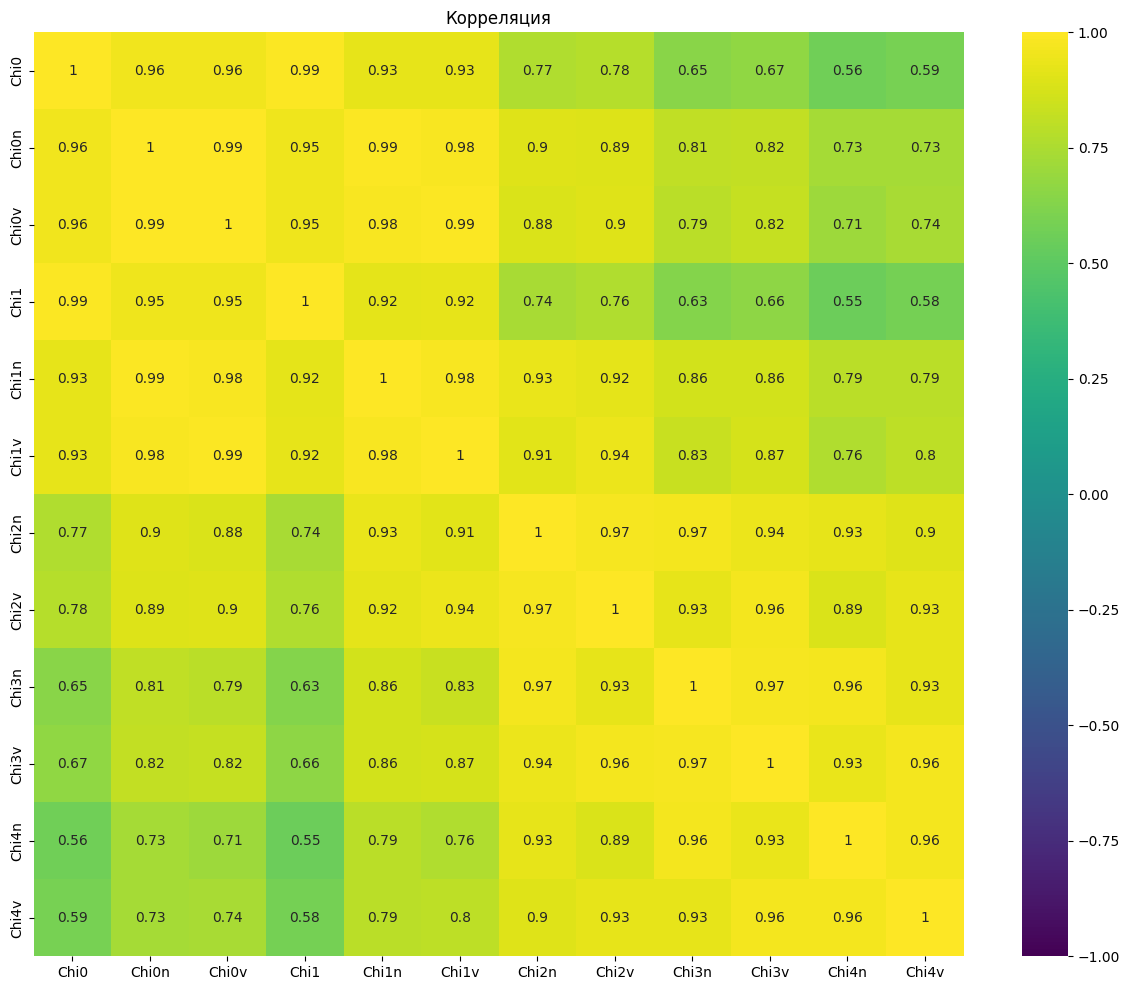

In [102]:
# Смотрим корреляцию между похожими признаками
correlation_matrix = df[['Chi0', 'Chi0n', 'Chi0v',
                         'Chi1', 'Chi1n', 'Chi1v',
                         'Chi2n', 'Chi2v',
                         'Chi3n', 'Chi3v',
                         'Chi4n', 'Chi4v']].corr(method='pearson')

# Визуально оценим это
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title("Корреляция")
plt.show()

In [103]:
# Виднео что все n – простые индексы и v – валентные индексы сильно коррелируют
# Оставим только валентный, как наиболее информативный

df.drop(['Chi0', 'Chi0n', 'Chi1', 'Chi1n', 'Chi2n', 'Chi3n', 'Chi4n'], axis=1, inplace=True)

**Снова оценим матрицу корреляций**

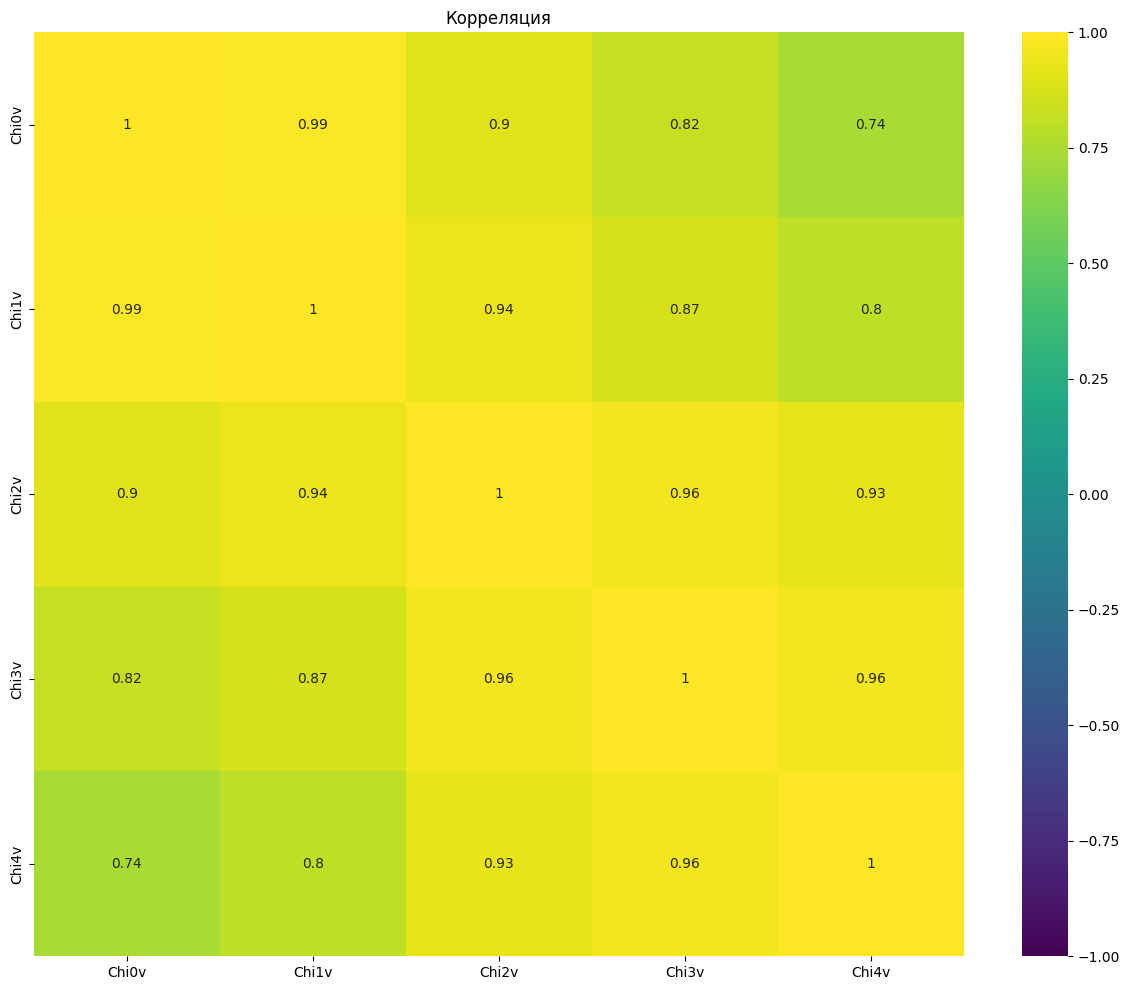

In [104]:
correlation_matrix = df[['Chi0v',
                         'Chi1v',
                         'Chi2v',
                         'Chi3v',
                         'Chi4v']].corr(method='pearson')

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title("Корреляция")
plt.show()

In [105]:
# Снова смотрим что сильно коррелирует - удаляем
df.drop(['Chi1v', 'Chi2v', 'Chi3v'], axis=1, inplace=True)

**====== PEOE_VSA, SMR_VSA, SlogP_VSA, EState_VSA ======**

**Объединим в общий признак Дескрипторы, связывающие парциальные заряды (PEOE) с площадью поверхности (VSA)**

In [106]:
df['PEOE_sum'] = df[['PEOE_VSA1', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4','PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 
                     'PEOE_VSA8', 'PEOE_VSA9', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14']].sum(axis=1)

df.drop(['PEOE_VSA1', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4','PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 
        'PEOE_VSA8', 'PEOE_VSA9', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14'], axis=1, inplace=True)

df['SMR_sum'] = df[['SMR_VSA1', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 
                    'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA9', 'SMR_VSA10']].sum(axis=1)

df.drop(['SMR_VSA1', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 
        'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA9', 'SMR_VSA10'], axis=1, inplace=True)

df['SlogP_sum'] = df[['SlogP_VSA1', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 
                    'SlogP_VSA7', 'SlogP_VSA8','SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12']].sum(axis=1)

df.drop(['SlogP_VSA1', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 
        'SlogP_VSA7', 'SlogP_VSA8','SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12'], axis=1, inplace=True)

df['EState_sum'] = df[['EState_VSA1', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4','EState_VSA5', 
                       'EState_VSA6', 'EState_VSA7', 'EState_VSA8','EState_VSA9', 'EState_VSA10', 'EState_VSA11']].sum(axis=1)

df.drop(['EState_VSA1', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4','EState_VSA5', 
        'EState_VSA6', 'EState_VSA7', 'EState_VSA8','EState_VSA9', 'EState_VSA10', 'EState_VSA11'], axis=1, inplace=True)

df['VSA_EState_sum'] = df[['VSA_EState1', 'VSA_EState2', 'VSA_EState3', 'VSA_EState4', 'VSA_EState5', 
                             'VSA_EState6', 'VSA_EState7', 'VSA_EState8','VSA_EState9', 'VSA_EState10']].sum(axis=1)

df.drop(['VSA_EState1', 'VSA_EState2', 'VSA_EState3', 'VSA_EState4', 'VSA_EState5', 
        'VSA_EState6', 'VSA_EState7', 'VSA_EState8','VSA_EState9', 'VSA_EState10'], axis=1, inplace=True)


**====== fr_ счётчики определённых функциональных групп ======**

**Счётчики определённых функциональных групп можно сгруппировать в отдельные группы**

**Все что не удалось отнести не к одной группе остаются отдельными признаками**

In [107]:
# Разделим на группы
# Кислотные
df['acid_groups'] = df['fr_COO'] + df['fr_COO2'] + df['fr_Ar_OH'] + df['fr_phenol'] + df['fr_Al_COO'] + df['fr_lactone'] + df['fr_imide']

# Азотсодержащие
df['basic_groups'] = df['fr_NH2'] + df['fr_NH1'] + df['fr_NH0'] + df['fr_aniline'] + \
                     df['fr_amidine'] + df['fr_guanido'] + df['fr_quatN'] + df['fr_Ar_NH'] + df['fr_Ar_N'] + \
                     df['fr_HOCCN'] + df['fr_hdrzine'] + df['fr_hdrzone']
 
# Гидроксильные и эфирные
df['hydroxyl_ether'] = df['fr_Al_OH'] + df['fr_Al_OH_noTert'] + df['fr_Ar_OH'] + df['fr_ether'] + df['fr_methoxy']

# Карбонильные 
df['carbonyl'] = df['fr_aldehyde'] + df['fr_ketone'] + df['fr_ketone_Topliss'] + \
                 df['fr_ester'] + df['fr_lactone'] + df['fr_C_O'] + df['fr_C_O_noCOO']

# Амиды и родственные
df['amide_like'] = df['fr_amide'] + df['fr_priamide'] + df['fr_urea'] + df['fr_alkyl_carbamate']

# Галогены
df['halogen_total'] = df['fr_halogen'] + df['fr_alkyl_halide']

# Серосодержащие
df['sulfur_groups'] = df['fr_C_S'] + df['fr_sulfide'] + df['fr_sulfonamd'] + df['fr_sulfone']

# Ароматические системы
df['aromatic'] = df['fr_benzene'] + df['fr_ArN'] + df['fr_Ar_N'] + df['fr_Ar_NH'] + df['fr_Ar_OH'] + \
                 df['fr_phenol'] + df['fr_aryl_methyl'] + df['fr_phenol_noOrthoHbond']

# Гетероциклы
df['heterocycles'] = df['fr_furan'] + df['fr_thiophene'] + df['fr_pyridine'] + df['fr_imidazole'] + df['fr_thiazole'] + \
                     df['fr_oxazole'] + df['fr_tetrazole'] + df['fr_Nhpyrrole'] + df['fr_bicyclic'] + \
                     df['fr_morpholine'] + df['fr_piperdine'] + df['fr_piperzine']

# Нитро- и азогруппы
df['nitro_azo'] = df['fr_nitro'] + df['fr_nitro_arom'] + df['fr_nitro_arom_nonortho'] + df['fr_azo']

# Ненасыщенные/реакционноспособные фрагменты
df['reactive_groups'] = df['fr_allylic_oxid'] + df['fr_term_acetylene'] + df['fr_epoxide'] + df['fr_Imine'] + df['fr_oxime'] + df['fr_nitrile']


In [108]:
# Удаляем используемые признаки
cols_to_drop = [
    'fr_COO', 'fr_COO2', 'fr_Ar_OH', 'fr_phenol', 'fr_Al_COO', 'fr_lactone', 'fr_imide',
    'fr_NH2', 'fr_NH1', 'fr_NH0', 'fr_aniline', 'fr_amidine', 'fr_guanido', 'fr_quatN', 'fr_Ar_NH', 'fr_Ar_N',
    'fr_Al_OH', 'fr_Al_OH_noTert', 'fr_ether', 'fr_methoxy',
    'fr_aldehyde', 'fr_ketone', 'fr_ketone_Topliss', 'fr_ester', 'fr_amide',
    'fr_priamide', 'fr_urea', 'fr_alkyl_carbamate',
    'fr_halogen', 'fr_alkyl_halide',
    'fr_C_S', 'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone',
    'fr_benzene', 'fr_ArN', 'fr_Ar_N', 'fr_Ar_OH', 'fr_aryl_methyl',
    'fr_furan', 'fr_thiophene', 'fr_pyridine', 'fr_imidazole', 'fr_thiazole', 'fr_oxazole', 'fr_tetrazole', 'fr_Nhpyrrole',
    'fr_nitro', 'fr_nitro_arom', 'fr_nitro_arom_nonortho', 'fr_azo',
    'fr_allylic_oxid', 'fr_term_acetylene', 'fr_epoxide', 'fr_Imine', 'fr_oxime', 'fr_C_O', 'fr_C_O_noCOO',
    'fr_HOCCN', 'fr_hdrzine', 'fr_hdrzone', 'fr_bicyclic', 'fr_morpholine', 'fr_piperdine', 'fr_piperzine', 'fr_nitrile', 'fr_phenol_noOrthoHbond'
]

df.drop(cols_to_drop, axis=1, inplace=True)

**Сохраняем данные в отдельный файл для дальнейшего использования моделями**

In [110]:
df.to_csv('data_eda.csv', index=False, encoding='utf-8')